# **Reto: Credito Bancario**

# Composición de los Datos 

- SOLICITUD: ID o número de la solicitud; clave para identificar y unir datos históricos.
- FECHA_INICIO: Fecha en que se inició la solicitud; puede ayudar a detectar estacionalidad o cambios en políticas de crédito.
- MULTAS_SIMIT: Número o valor de multas de tránsito; indicador de comportamiento y posible riesgo de incumplimiento.
- EDAD: Edad del solicitante; influye en la estabilidad laboral y capacidad de pago.
- CUOTA_INICIAL: Monto inicial pagado; mayor valor indica mayor compromiso financiero.
- GENERO: Género del solicitante; puede correlacionar con patrones de pago (usar con cuidado por sesgos).
- ESTADO_CIVIL: Estado civil; asociado a estabilidad económica y responsabilidades financieras.
- NIVEL_ESTUDIO: Nivel educativo; correlaciona con ingresos y estabilidad laboral.
- TIPO_VIVIENDA: Propia, arrendada, familiar; indicador de estabilidad y gastos fijos.
- PERSONAS_CARGO: Dependientes económicos; afecta la capacidad de pago.
- ZONA: Ubicación geográfica; puede influir en ingresos, costos y riesgo.
- PLAZO: Tiempo para pagar el crédito; plazos más largos implican mayor riesgo de impago acumulado.
- CODEUDOR: Existencia de garante; reduce riesgo para el banco.
- VALOR_SOLICITADO: Monto del crédito; relación con ingresos y capacidad de pago.
- INGRESOS: Ingreso mensual; principal variable para capacidad de pago.
- EGRESOS: Gastos mensuales; permite calcular margen de pago.
- SUBTIPO_CLIENTE: Clasificación interna; puede reflejar historial previo.
- TIPO_CLIENTE: Nuevo o recurrente; clientes previos con buen historial tienen menor riesgo.
- HABITO_PAGO: Historial de pago; predictor directo de morosidad.
- ENDEUDAMIENTO: Nivel de deudas actuales; alto endeudamiento implica mayor riesgo.
- CALIFICACION: Score crediticio; síntesis de riesgo basada en histórico.
- CREDITOS_VIGENTES: Número de créditos activos; impacta carga financiera total.
- Puntaje Riesgo: Métrica interna de riesgo; directamente relacionada con la probabilidad de incumplimiento.
- TIPO_CONTRATO: Tipo de empleo; contratos fijos dan mayor estabilidad que temporales.
- ANTIGUEDAD: Tiempo en el empleo actual; más antigüedad implica mayor estabilidad.
- Marca producto: Tipo o categoría del producto financiero; puede tener riesgos distintos.
- Estado: Resultado de la solicitud (aprobado, rechazado, etc.); variable objetivo si es clasificación.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_excel('2.1 Ejercicio Base Excel.xlsx')
data

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,...,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado
0,4,2017-01-02,0.0,25,0,M,Casado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,51940.0,A,2,1929,Otra,12,Marca A,Negada
1,8,2017-01-02,0.0,25,702000,F,Casado,Técnico,Arrendada,1,...,Independiente sin Establecimiento,B,492900.0,C,1,2373,Por Obra o Labor,21,Marca A,Anulada
2,706,2017-01-02,0.0,25,702000,F,Casado,Técnico,Arrendada,1,...,Independiente sin Establecimiento,B,492900.0,C,1,2373,Por Obra o Labor,21,Marca A,Aprobada
3,12,2017-01-02,0.0,26,557910,F,Casado,Tecnólogico,Propia sin hipoteca,3,...,Independiente sin Establecimiento,E,0.0,C,2,1338,Indefinido,6,Marca A,Desistida
4,31,2017-01-02,0.0,26,386910,M,Casado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,E,453680.0,E,6,2037,Por Obra o Labor,20,Marca A,Anulada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,33596,2017-12-29,0.0,29,727200,F,Casado,Tecnólogico,Propia sin hipoteca,1,...,Independiente sin Establecimiento,B,164300.0,A,2,2352,Otra,11,Marca A,Anulada
33664,33639,2017-12-29,0.0,29,817200,F,Casado,Tecnólogico,Propia sin hipoteca,1,...,Independiente sin Establecimiento,B,164300.0,A,2,2352,Otra,11,Marca A,Aprobada
33665,33602,2017-12-29,0.0,31,494910,F,Casado,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,781220.0,A,6,2088,Indefinido,5,Marca A,Desistida
33666,33591,2017-12-29,0.0,34,2205000,F,Divorciado,Primaria,Arrendada,2,...,Independiente sin Establecimiento,E,355100.0,A,8,2064,Por Obra o Labor,43,Marca A,Desistida


## **Entendimiento de los datos (EDA)**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#Identificación de datos Nulos 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SOLICITUD          33668 non-null  int64         
 1   FECHA_INICIO       33668 non-null  datetime64[ns]
 2   MULTAS_SIMIT       33668 non-null  float64       
 3   EDAD               33668 non-null  int64         
 4   CUOTA_INICIAL      33668 non-null  int64         
 5   GENERO             33668 non-null  object        
 6   ESTADO_CIVIL       33668 non-null  object        
 7   NIVEL_ESTUDIO      33668 non-null  object        
 8   TIPO_VIVIENDA      33668 non-null  object        
 9   PERSONAS_CARGO     33668 non-null  int64         
 10  ZONA               33668 non-null  object        
 11  PLAZO              33668 non-null  int64         
 12  CODEUDOR           33668 non-null  object        
 13  VALOR_SOLICITADO   33668 non-null  float64       
 14  INGRES

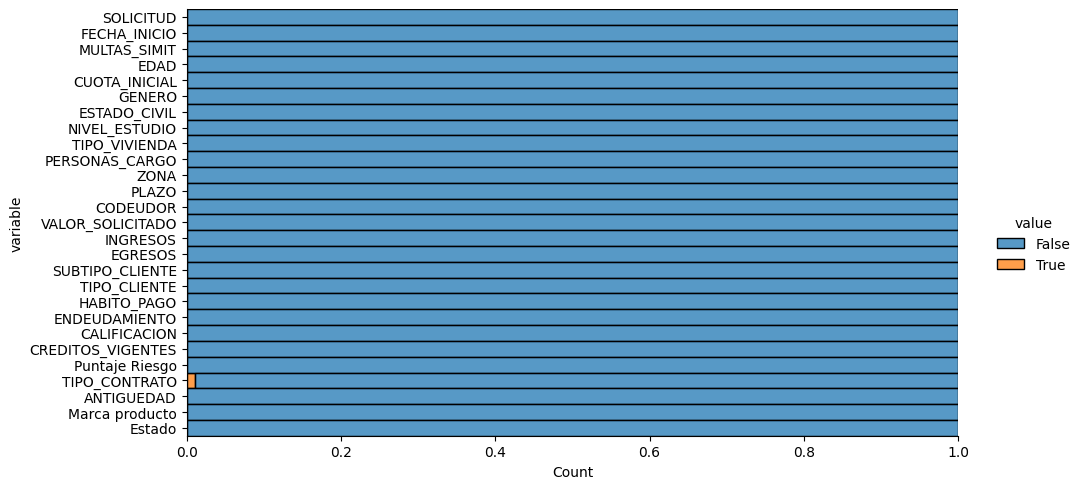

In [5]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

Solo encontramos una variable con datos Nulos (TIPO_CONTRATO)

No tiene sentido eliminar la variable ya que se ve que el porcentaje de nulos es << 1%.
Podríamos eliminar esos registros, pero primero terminemos de explorar los datos. Quiero ver si la variable puede ser eliminada por otra razón.

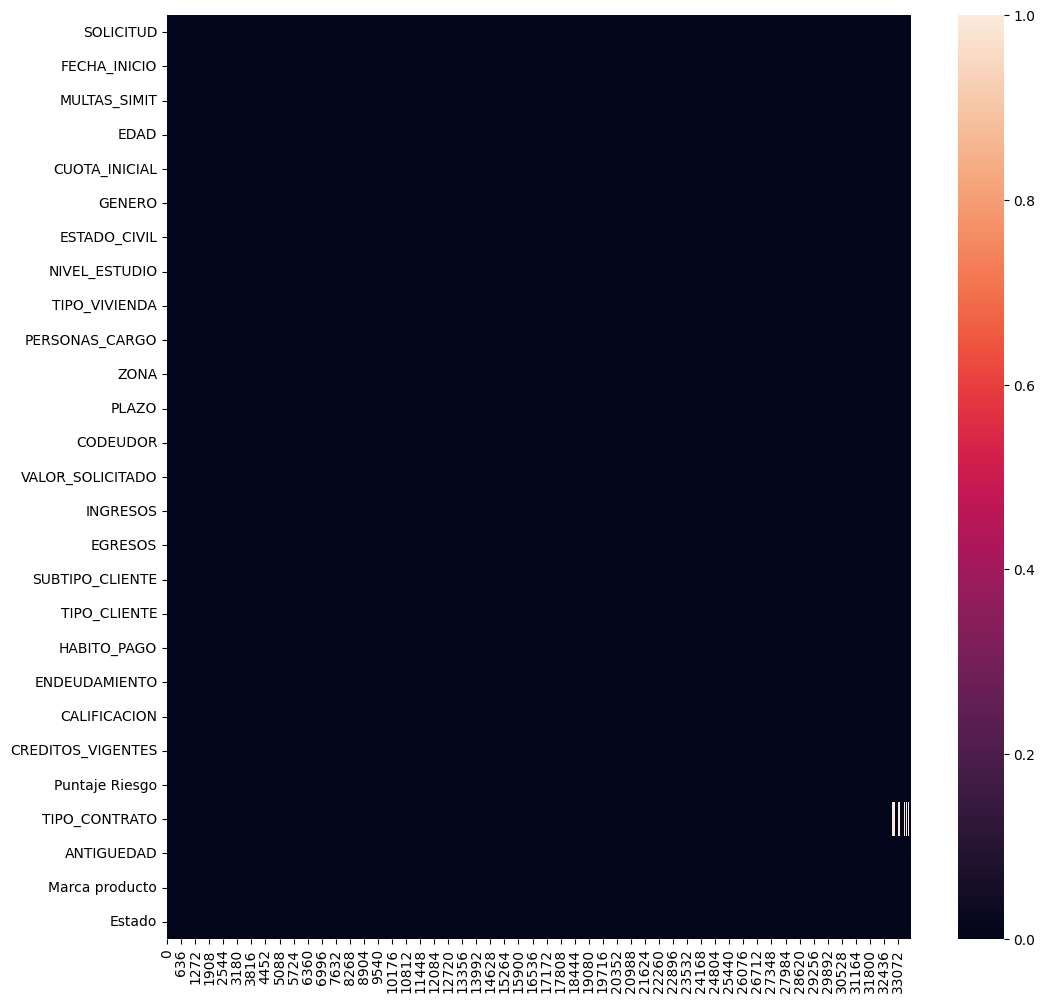

In [6]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

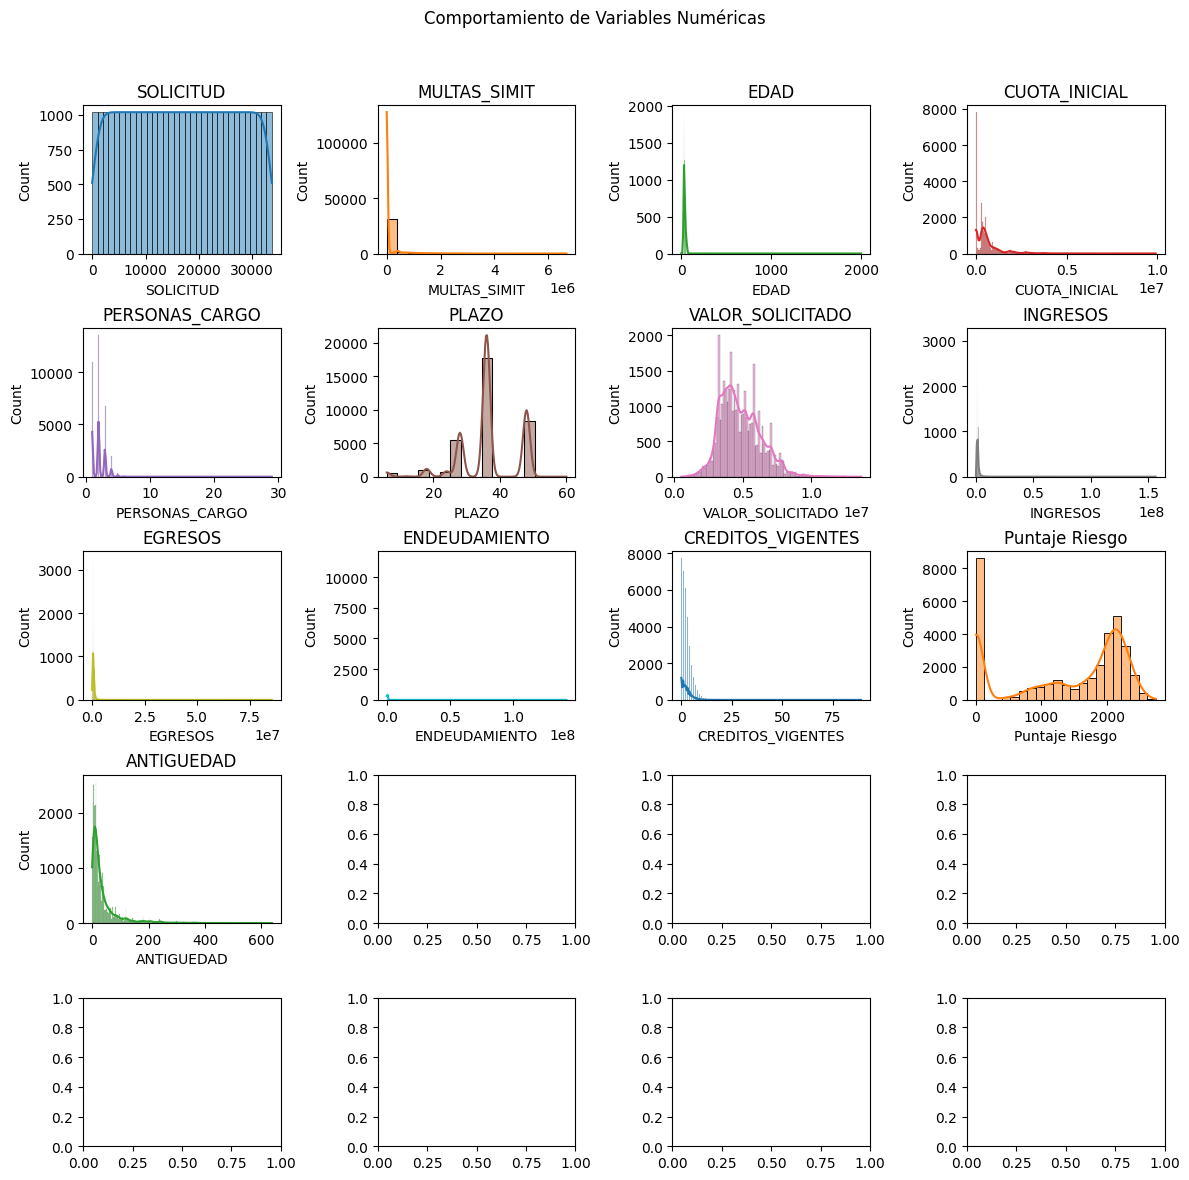

In [7]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

Hay MUCHOS datos sesgados... Casi ninguna gráfica parece normal.

Claramente podemos eliminar solicitud, no tiene efecto en el modelo.

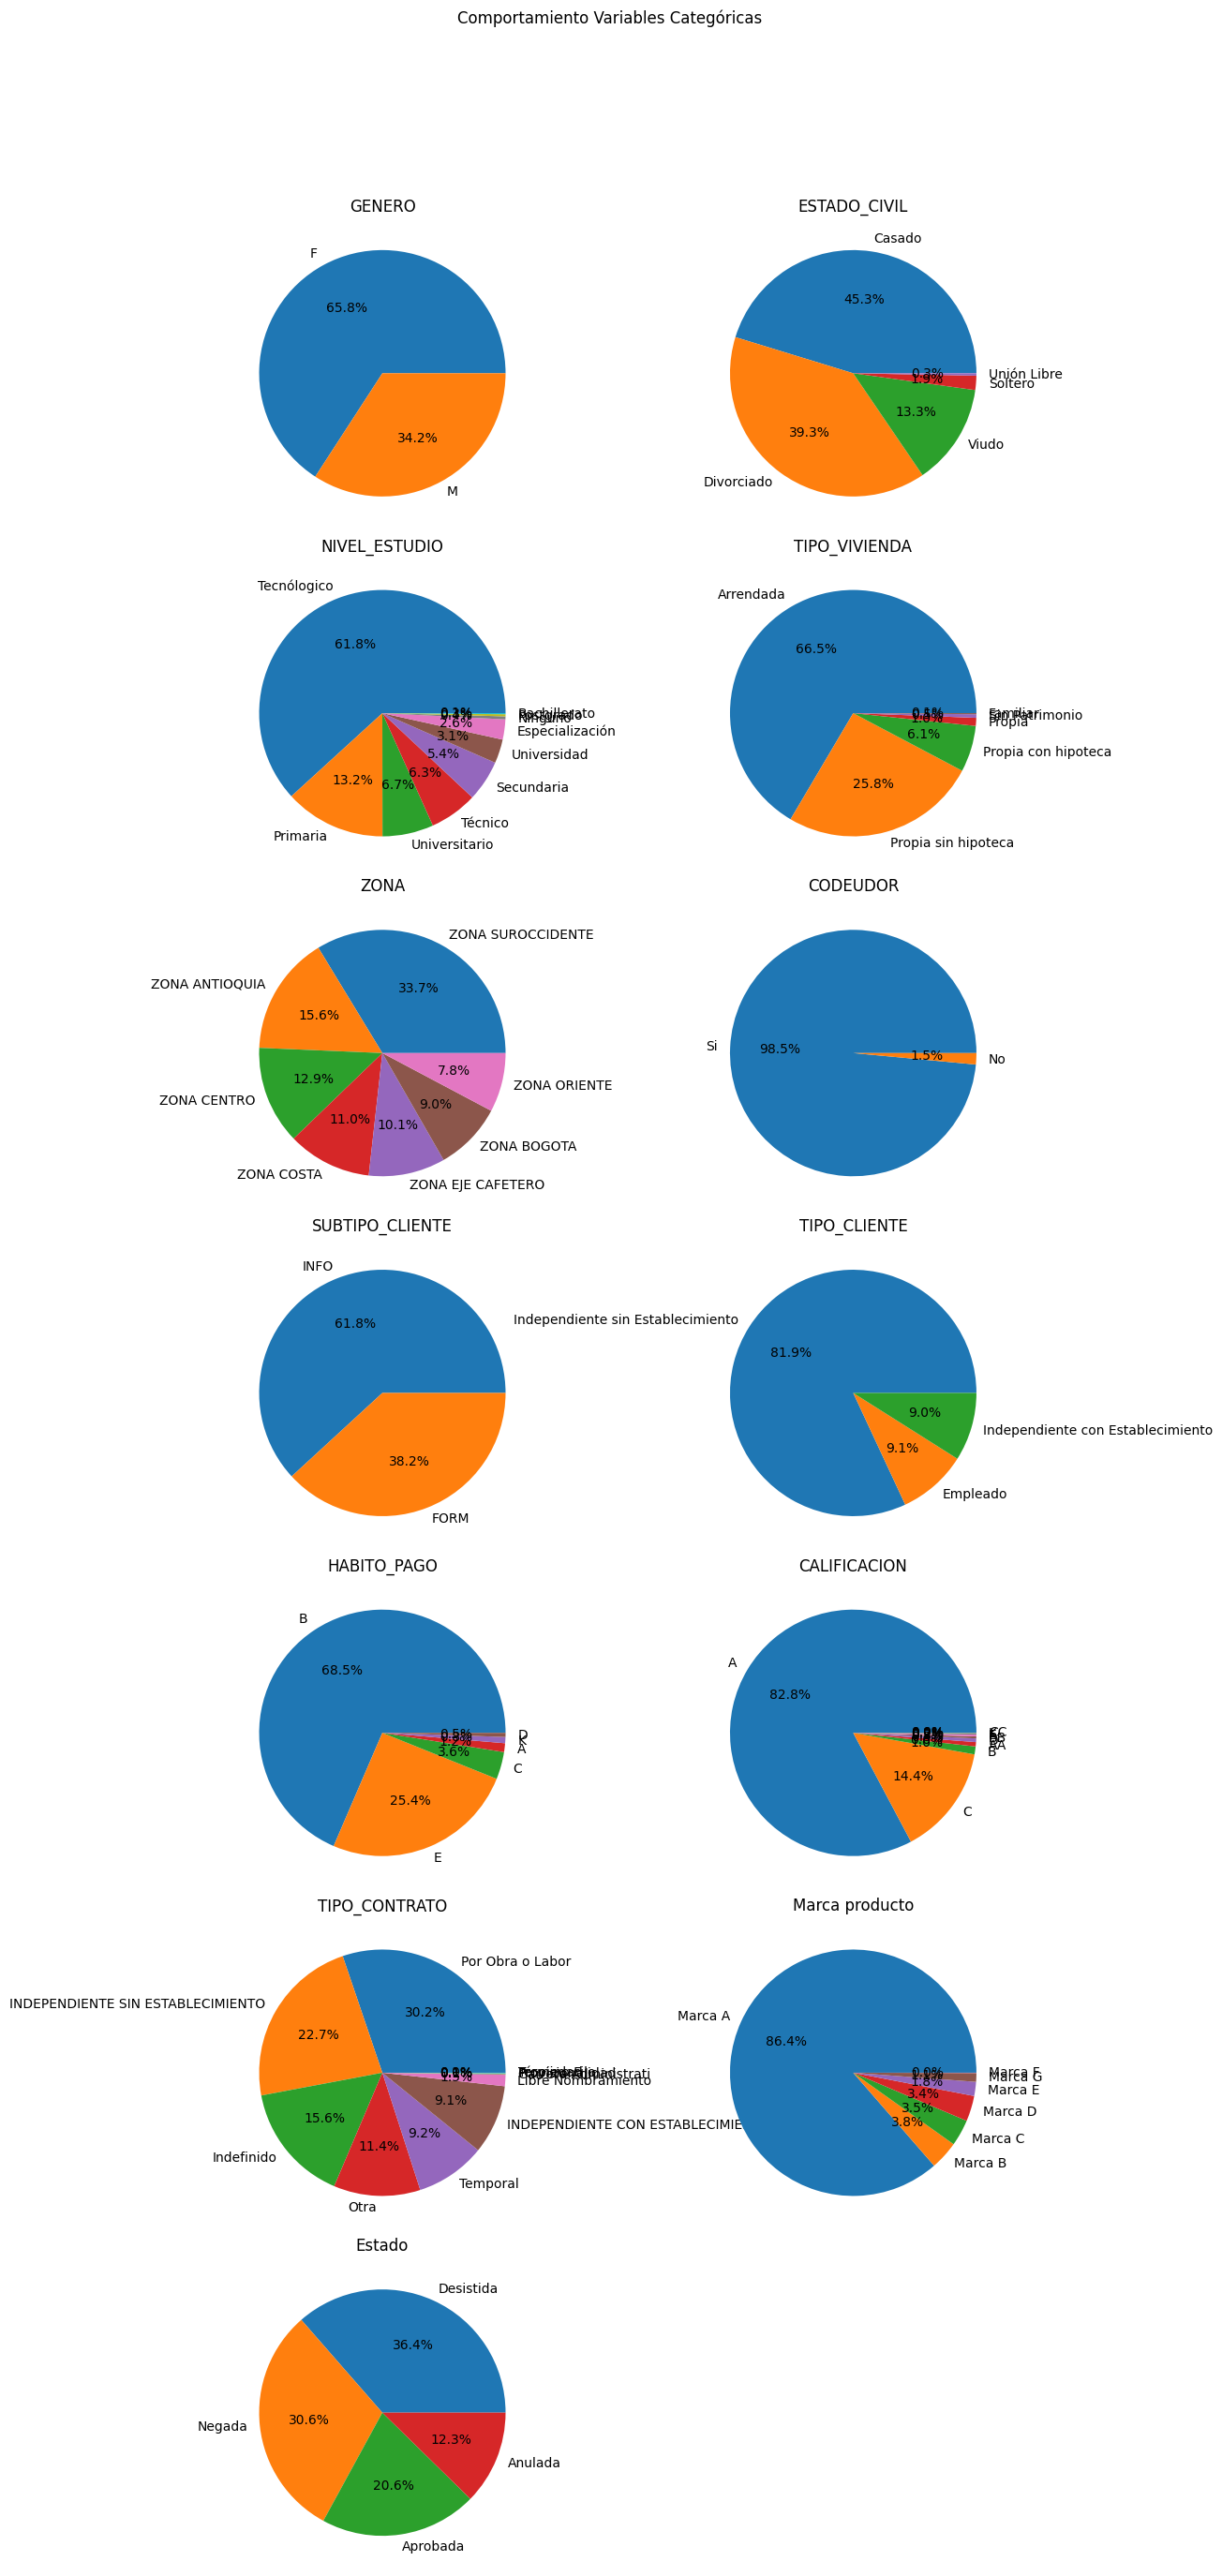

In [8]:

##GRÁFICOS DE TORTA
cat_col = data.select_dtypes(include=['object']).columns
n = len(cat_col)
n_cols = 2
n_rows = int(np.ceil(n / n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
ax = ax.flat

for i, col in enumerate(cat_col):
    ax[i].pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%0.1f%%')
    ax[i].set_title(col)

# Oculta los ejes vacíos si hay
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

### Ataquemos los problemas uno a uno. 

**Empecemos por las variables categóricas**

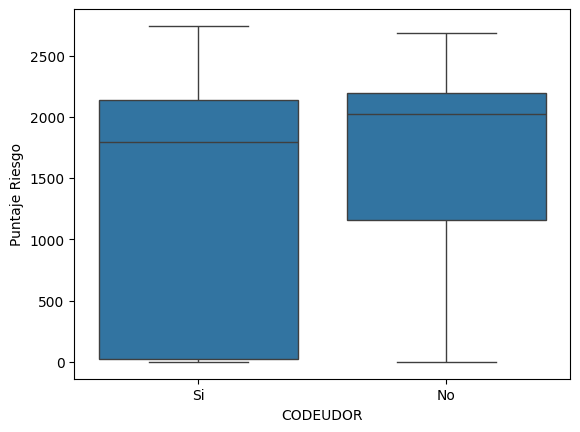

In [9]:
#Codeudor está absoludamente desbalanceada, mieremos la variable en un scatter plot con puntaje de riezgo
sb.boxplot(data = data, x = 'CODEUDOR', y = 'Puntaje Riesgo')
plt.show()

In [10]:
data_mod = data

data_mod = data.drop(columns = ['SOLICITUD', 'FECHA_INICIO'], axis = 1)  # Eliminamos la variable solicitud, no tiene efecto en el modelo
# Vista inicial de los datos
data_mod.head(), data_mod.shape, data_mod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MULTAS_SIMIT       33668 non-null  float64
 1   EDAD               33668 non-null  int64  
 2   CUOTA_INICIAL      33668 non-null  int64  
 3   GENERO             33668 non-null  object 
 4   ESTADO_CIVIL       33668 non-null  object 
 5   NIVEL_ESTUDIO      33668 non-null  object 
 6   TIPO_VIVIENDA      33668 non-null  object 
 7   PERSONAS_CARGO     33668 non-null  int64  
 8   ZONA               33668 non-null  object 
 9   PLAZO              33668 non-null  int64  
 10  CODEUDOR           33668 non-null  object 
 11  VALOR_SOLICITADO   33668 non-null  float64
 12  INGRESOS           33668 non-null  float64
 13  EGRESOS            33668 non-null  float64
 14  SUBTIPO_CLIENTE    33668 non-null  object 
 15  TIPO_CLIENTE       33668 non-null  object 
 16  HABITO_PAGO        336

(   MULTAS_SIMIT  EDAD  CUOTA_INICIAL GENERO ESTADO_CIVIL NIVEL_ESTUDIO  \
 0           0.0    25              0      M       Casado   Tecnólogico   
 1           0.0    25         702000      F       Casado       Técnico   
 2           0.0    25         702000      F       Casado       Técnico   
 3           0.0    26         557910      F       Casado   Tecnólogico   
 4           0.0    26         386910      M       Casado   Tecnólogico   
 
          TIPO_VIVIENDA  PERSONAS_CARGO               ZONA  PLAZO  ...  \
 0            Arrendada               2         ZONA COSTA     36  ...   
 1            Arrendada               1  ZONA SUROCCIDENTE     36  ...   
 2            Arrendada               1  ZONA SUROCCIDENTE     36  ...   
 3  Propia sin hipoteca               3  ZONA SUROCCIDENTE     36  ...   
 4            Arrendada               2       ZONA ORIENTE     36  ...   
 
                         TIPO_CLIENTE  HABITO_PAGO  ENDEUDAMIENTO  \
 0  Independiente sin Establecimi

In [11]:
import sklearn 
categorical_cols = data_mod.select_dtypes(include = ['object']).columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer 

,transformers,"[('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [12]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
data_transformed

,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,ZONA,CODEUDOR,SUBTIPO_CLIENTE,TIPO_CLIENTE,HABITO_PAGO,CALIFICACION,...,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,Puntaje Riesgo,ANTIGUEDAD
0,1.0,0.0,6.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,36.0,4513950.0,862400.00,395500.0,51940.0,2.0,1929.0,12.0
1,0.0,0.0,7.0,0.0,6.0,1.0,1.0,2.0,1.0,5.0,...,702000.0,1.0,36.0,7738500.0,1817249.28,497200.0,492900.0,1.0,2373.0,21.0
2,0.0,0.0,7.0,0.0,6.0,1.0,1.0,2.0,1.0,5.0,...,702000.0,1.0,36.0,7999950.0,1817249.28,497200.0,492900.0,1.0,2373.0,21.0
3,0.0,0.0,6.0,4.0,6.0,1.0,1.0,2.0,4.0,5.0,...,557910.0,3.0,36.0,5858055.0,1112532.96,711900.0,0.0,2.0,1338.0,6.0
4,1.0,0.0,6.0,0.0,5.0,1.0,1.0,2.0,4.0,8.0,...,386910.0,2.0,36.0,4062555.0,1113575.68,294930.0,453680.0,6.0,2037.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,0.0,0.0,6.0,4.0,4.0,1.0,1.0,2.0,1.0,1.0,...,727200.0,1.0,48.0,5030550.0,1252968.64,565000.0,164300.0,2.0,2352.0,11.0
33664,0.0,0.0,6.0,4.0,4.0,1.0,1.0,2.0,1.0,1.0,...,817200.0,1.0,48.0,5030550.0,1252968.64,565000.0,164300.0,2.0,2352.0,11.0
33665,0.0,0.0,6.0,0.0,4.0,1.0,1.0,2.0,4.0,1.0,...,494910.0,1.0,36.0,5196555.0,1575791.84,476860.0,781220.0,6.0,2088.0,5.0
33666,0.0,1.0,4.0,0.0,4.0,1.0,1.0,2.0,4.0,1.0,...,2205000.0,2.0,28.0,3412500.0,1668582.72,505110.0,355100.0,8.0,2064.0,43.0


In [14]:
#Imputación recursiva
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = RandomForestRegressor(),
                                                    initial_strategy = 'most_frequent',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns = data_transformed.columns,
                                    index = data_transformed.index)
data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GENERO             33668 non-null  float64
 1   ESTADO_CIVIL       33668 non-null  float64
 2   NIVEL_ESTUDIO      33668 non-null  float64
 3   TIPO_VIVIENDA      33668 non-null  float64
 4   ZONA               33668 non-null  float64
 5   CODEUDOR           33668 non-null  float64
 6   SUBTIPO_CLIENTE    33668 non-null  float64
 7   TIPO_CLIENTE       33668 non-null  float64
 8   HABITO_PAGO        33668 non-null  float64
 9   CALIFICACION       33668 non-null  float64
 10  TIPO_CONTRATO      33668 non-null  float64
 11  Marca producto     33668 non-null  float64
 12  Estado             33668 non-null  float64
 13  MULTAS_SIMIT       33668 non-null  float64
 14  EDAD               33668 non-null  float64
 15  CUOTA_INICIAL      33668 non-null  float64
 16  PERSONAS_CARGO     336

In [15]:
data_imputed = data_recursive_df.copy()

data_imputed[categorical_cols] = categorical_transformer.named_transformers_['ordinalencoder'].inverse_transform(data_recursive_df[categorical_cols])

data_imputed

,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,ZONA,CODEUDOR,SUBTIPO_CLIENTE,TIPO_CLIENTE,HABITO_PAGO,CALIFICACION,...,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,Puntaje Riesgo,ANTIGUEDAD
0,M,Casado,Tecnólogico,Arrendada,ZONA COSTA,Si,INFO,Independiente sin Establecimiento,B,A,...,0.0,2.0,36.0,4513950.0,862400.0,395500.0,51940.0,2.0,1929.0,12.0
1,F,Casado,Técnico,Arrendada,ZONA SUROCCIDENTE,Si,INFO,Independiente sin Establecimiento,B,C,...,702000.0,1.0,36.0,7738500.0,1817249.0,497200.0,492900.0,1.0,2373.0,21.0
2,F,Casado,Técnico,Arrendada,ZONA SUROCCIDENTE,Si,INFO,Independiente sin Establecimiento,B,C,...,702000.0,1.0,36.0,7999950.0,1817249.0,497200.0,492900.0,1.0,2373.0,21.0
3,F,Casado,Tecnólogico,Propia sin hipoteca,ZONA SUROCCIDENTE,Si,INFO,Independiente sin Establecimiento,E,C,...,557910.0,3.0,36.0,5858055.0,1112533.0,711900.0,0.0,2.0,1338.0,6.0
4,M,Casado,Tecnólogico,Arrendada,ZONA ORIENTE,Si,INFO,Independiente sin Establecimiento,E,E,...,386910.0,2.0,36.0,4062555.0,1113576.0,294930.0,453680.0,6.0,2037.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,F,Casado,Tecnólogico,Propia sin hipoteca,ZONA EJE CAFETERO,Si,INFO,Independiente sin Establecimiento,B,A,...,727200.0,1.0,48.0,5030550.0,1252969.0,565000.0,164300.0,2.0,2352.0,11.0
33664,F,Casado,Tecnólogico,Propia sin hipoteca,ZONA EJE CAFETERO,Si,INFO,Independiente sin Establecimiento,B,A,...,817200.0,1.0,48.0,5030550.0,1252969.0,565000.0,164300.0,2.0,2352.0,11.0
33665,F,Casado,Tecnólogico,Arrendada,ZONA EJE CAFETERO,Si,INFO,Independiente sin Establecimiento,E,A,...,494910.0,1.0,36.0,5196555.0,1575792.0,476860.0,781220.0,6.0,2088.0,5.0
33666,F,Divorciado,Primaria,Arrendada,ZONA EJE CAFETERO,Si,INFO,Independiente sin Establecimiento,E,A,...,2205000.0,2.0,28.0,3412500.0,1668583.0,505110.0,355100.0,8.0,2064.0,43.0


In [17]:
data_neg = data_imputed[data_imputed['Estado'] == 'Negada']
data_dest = data_imputed[data_imputed['Estado'] == 'Desistida']
data_apr= data_imputed[data_imputed['Estado'] == 'Aprobada']
data_anu = data_imputed[data_imputed['Estado'] == 'Anulada']

print(f'El tamaño de la clase Negada es: {data_neg.shape}')
print(f'El tamaño de la clase Desistida es: {data_dest.shape}')
print(f'El tamaño de la clase Aprobada es: {data_apr.shape}')
print(f'El tamaño de la clase Anulada es: {data_anu.shape}')


El tamaño de la clase Negada es: (10310, 25)
El tamaño de la clase Desistida es: (12265, 25)
El tamaño de la clase Aprobada es: (6939, 25)
El tamaño de la clase Anulada es: (4154, 25)


In [ ]:
#Rebalanceo de la "Y" mediante sobremuestreo aleatorio.
data_neg_re = data_neg.sample(data_dest.shape[0], replace = True)
data_apr_re = data_apr.sample(data_dest.shape[0], replace = True)
data_anu_re = data_anu.sample(data_dest.shape[0], replace = True)
data_balanced = pd.concat([data_neg_re, data_dest, data_apr_re, data_anu_re])
data_balanced.reset_index(drop = True, inplace = True)
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49060 entries, 0 to 49059
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GENERO             49060 non-null  object 
 1   ESTADO_CIVIL       49060 non-null  object 
 2   NIVEL_ESTUDIO      49060 non-null  object 
 3   TIPO_VIVIENDA      49060 non-null  object 
 4   ZONA               49060 non-null  object 
 5   CODEUDOR           49060 non-null  object 
 6   SUBTIPO_CLIENTE    49060 non-null  object 
 7   TIPO_CLIENTE       49060 non-null  object 
 8   HABITO_PAGO        49060 non-null  object 
 9   CALIFICACION       49060 non-null  object 
 10  TIPO_CONTRATO      49060 non-null  object 
 11  Marca producto     49060 non-null  object 
 12  Estado             49060 non-null  object 
 13  MULTAS_SIMIT       49060 non-null  float64
 14  EDAD               49060 non-null  float64
 15  CUOTA_INICIAL      49060 non-null  float64
 16  PERSONAS_CARGO     490

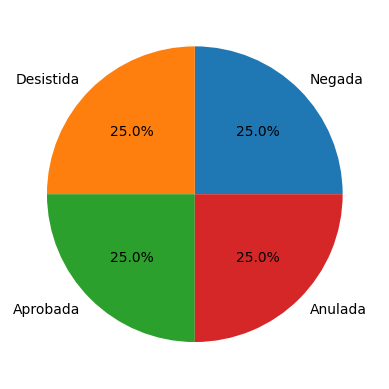

In [19]:
plt.pie(x = data_balanced.Estado.value_counts(), labels = data_balanced.Estado.value_counts().index, autopct= '%0.1f%%')
plt.show()

In [20]:
X = data_balanced.drop('Estado', axis = 1)
y = data_balanced[['Estado']]
print(f'El tamaño de X es: {X.shape} y el tamaño de y es: {y.shape}')

El tamaño de X es: (49060, 24) y el tamaño de y es: (49060, 1)


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(sparse_output=False))])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)], remainder = 'passthrough')
preprocessor 

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [25]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
X_pro = pd.DataFrame(X_pre, columns = labels)
X_pro.head(10)

,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,...,TIPO_CONTRATO_Provisionalidad,TIPO_CONTRATO_Temporal,TIPO_CONTRATO_Término Fijo,Marca producto_Marca A,Marca producto_Marca B,Marca producto_Marca C,Marca producto_Marca D,Marca producto_Marca E,Marca producto_Marca F,Marca producto_Marca G
0,0.0,0.032484,0.000000,0.000000,0.222222,0.280144,0.006089,0.005284,0.002591,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.018491,0.000000,0.000000,0.777778,0.424259,0.006805,0.000661,0.005301,0.056180,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.016992,0.179182,0.000000,0.555556,0.522658,0.014327,0.001321,0.009526,0.033708,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015992,0.000000,0.035714,0.555556,0.424339,0.014327,0.010568,0.002591,0.011236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.019990,0.042718,0.035714,0.555556,0.355973,0.009077,0.005020,0.003828,0.033708,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.023988,0.056355,0.107143,0.555556,0.428343,0.025788,0.013210,0.004408,0.033708,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.023488,0.076355,0.071429,0.407407,0.565180,0.085960,0.039630,0.006924,0.033708,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.014993,0.000000,0.035714,0.555556,0.301041,0.008596,0.006605,0.024837,0.033708,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.012494,0.074545,0.035714,0.555556,0.550040,0.008596,0.004624,0.002591,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.015492,0.054536,0.000000,0.777778,0.392242,0.022518,0.006605,0.064673,0.067416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size = 0.7, random_state = 123)
#Coge x_pro y y y los divide en dos grupos, por default 2/3 y 1/3; Tenemos que ver que escenario queremos (Ácido, laxo...) EN este caso 70% entrenamiento y 30% testeo
print(f'El tamaño del conjunto de entrenamiento es: {X_train.shape} {y_train.shape}\n y el tamaño del conjunto de testeo es: {X_test.shape} {y_test.shape}')

El tamaño del conjunto de entrenamiento es: (34342, 83) (34342, 1)
 y el tamaño del conjunto de testeo es: (14718, 83) (14718, 1)


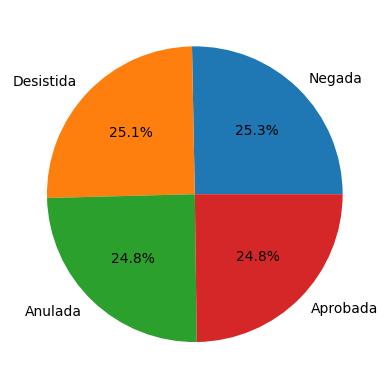

In [27]:
plt.pie(x = y_train.Estado.value_counts(), labels = y_train.Estado.value_counts().index, autopct= '%0.1f%%')
plt.show()

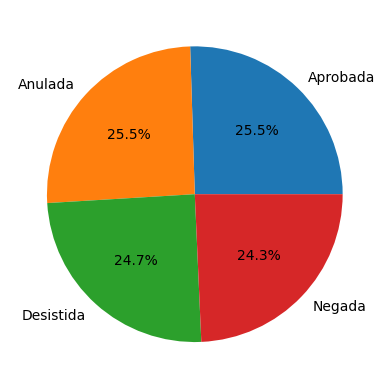

In [28]:
plt.pie(x = y_test.Estado.value_counts(), labels = y_test.Estado.value_counts().index, autopct= '%0.1f%%')
plt.show()

# **7. Modelado de Datos**
- Regresión Logística 
- K Vecinos más Cercanos 
- Máquinas de Sopoerte vectorial 
- Árboles de Decisión 
- Bosque Aleatorio 
- Adaptative Boosting 
- Gradient Boosting 
- RNA 

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
modelo_1 = LogisticRegression(solver = 'saga', random_state = 123)
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet']
}
clf_1 = GridSearchCV(estimator = modelo_1, param_grid = param_grid, cv = 5, scoring = 'accuracy') #El f1 solo solo sirve para problemas de dos clases, este problema es de 3 clases, cambiamos a accuracy.
#Usamos un cv impar para que no haya paridad si se dan p.ej 4 experimentos, puede que 2 favorezcan unos hiperparámetros y los otros 2 a otros diferentes.
clf_1.fit(X_train, y_train)

,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.0001, 0.001, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [30]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns = ['accuracy'])], axis = 1)
validation.sort_values(by = 'accuracy', ascending = False)

,C,penalty,accuracy
22,1000.0000,l2,0.404111
21,1000.0000,l1,0.404082
18,100.0000,l1,0.404082
15,10.0000,l1,0.403878
19,100.0000,l2,0.403733
16,10.0000,l2,0.398841
12,1.0000,l1,0.398433
13,1.0000,l2,0.388853
10,0.1000,l2,0.378778
9,0.1000,l1,0.376623


In [31]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


Metricas de desempeño de entrenamiento
              precision    recall  f1-score   support

     Anulada       0.37      0.40      0.38      8518
    Aprobada       0.39      0.33      0.36      8512
   Desistida       0.37      0.34      0.35      8623
      Negada       0.49      0.57      0.53      8689

    accuracy                           0.41     34342
   macro avg       0.41      0.41      0.41     34342
weighted avg       0.41      0.41      0.41     34342



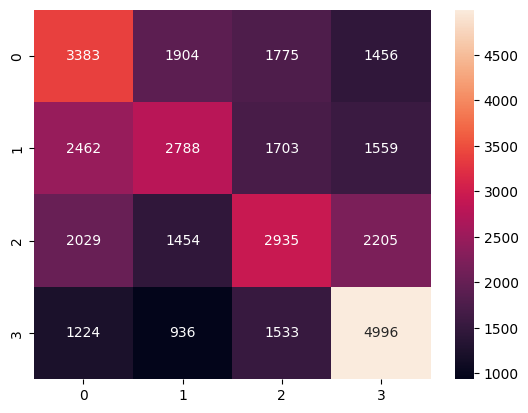

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de desempeño de entrenamiento')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot = True, fmt = 'd')
plt.show()

#A la luz de la métrica de desempeño establecida, este es un buen modelo 

Metricas de desempeño de testeo
              precision    recall  f1-score   support

     Anulada       0.36      0.38      0.37      3747
    Aprobada       0.40      0.34      0.37      3753
   Desistida       0.35      0.32      0.33      3642
      Negada       0.48      0.57      0.52      3576

    accuracy                           0.40     14718
   macro avg       0.40      0.40      0.40     14718
weighted avg       0.40      0.40      0.40     14718



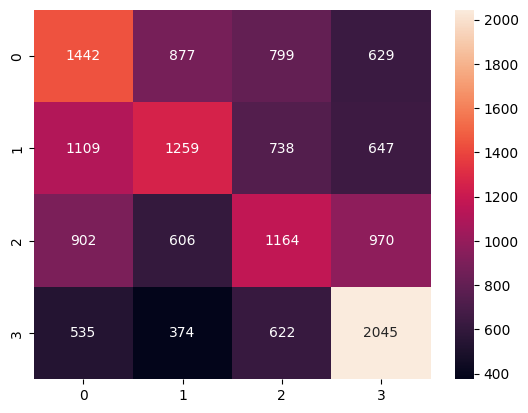

In [33]:
y_pred_test_1 = modelo_1_final.predict(X_test)
print('Metricas de desempeño de testeo')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot = True, fmt = 'd')
plt.show()

In [34]:
#K vecinos más cercanos 
from sklearn.neighbors import KNeighborsClassifier
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 19, 21, 53], 'p' : [1, 2]} #p es la métrica de distancia, 1 manhattan, 2 euclideana
clf_2 = GridSearchCV(estimator = modelo_2, param_grid = param_grid, cv = 5, scoring = 'f1_weighted')
clf_2.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [35]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns = ['f1'])], axis = 1)
validation.sort_values(by = 'f1', ascending = False)


,n_neighbors,p,f1
0,3,1,0.482916
1,3,2,0.480256
2,5,1,0.433235
3,5,2,0.430485
4,7,1,0.412080
5,7,2,0.408973
7,9,2,0.396527
6,9,1,0.396462
8,19,1,0.380987
10,21,1,0.379532


Metricas de desempeño de testeo
              precision    recall  f1-score   support

     Anulada       0.36      0.38      0.37      3747
    Aprobada       0.40      0.34      0.37      3753
   Desistida       0.35      0.32      0.33      3642
      Negada       0.48      0.57      0.52      3576

    accuracy                           0.40     14718
   macro avg       0.40      0.40      0.40     14718
weighted avg       0.40      0.40      0.40     14718



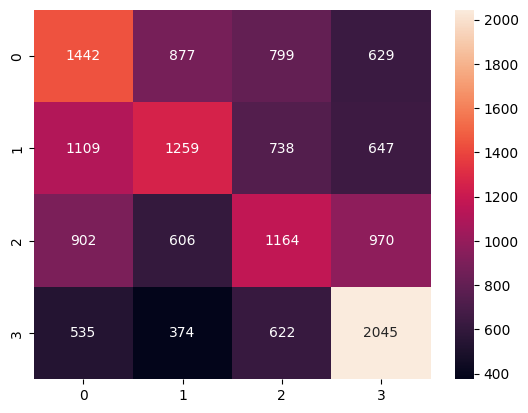

In [37]:
y_pred_test_2 = modelo_2_final.predict(X_test)
print('Metricas de desempeño de testeo')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot = True, fmt = 'd')
plt.show()

Metricas de desempeño de testeo
              precision    recall  f1-score   support

     Anulada       0.36      0.38      0.37      3747
    Aprobada       0.40      0.34      0.37      3753
   Desistida       0.35      0.32      0.33      3642
      Negada       0.48      0.57      0.52      3576

    accuracy                           0.40     14718
   macro avg       0.40      0.40      0.40     14718
weighted avg       0.40      0.40      0.40     14718



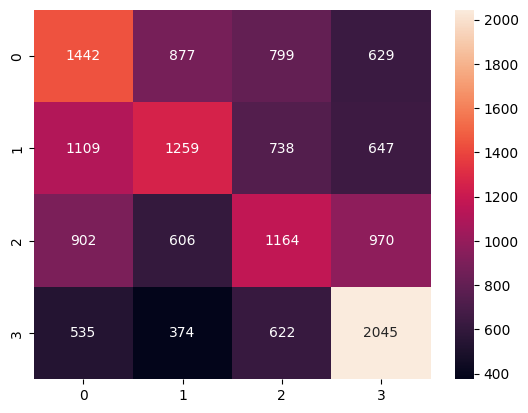

In [38]:
y_pred_test_2 = modelo_2_final.predict(X_test)
print('Metricas de desempeño de testeo')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot = True, fmt = 'd')
plt.show()